In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.generate_phrases import generate_random_phrase, generate_random_phrase_with_mutation, alphabet

In [9]:
def generate_phrases(phrase, u=0.1, gen_max=1e7):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen = 0
    initial_phrase = generate_random_phrase(phrase_size, alphabet)
    new_phrase = initial_phrase
    reached = False
    while True:
        if new_phrase == phrase:
            reached = True

        if new_phrase == phrase or gen >= gen_max:
            break
        new_phrase = generate_random_phrase_with_mutation(initial_phrase, alphabet=alphabet, u=u)
        gen += 1
    return initial_phrase, {"gen": gen, "reached": reached}


In [ ]:
def plot_graphs_and_describe(full_gens, u_list):
    d = {}

    for i in range(len(full_gens)):
        d[f"U{u_list[i]}"] = full_gens[i]

    df = pd.DataFrame(d)

    print(df.describe())

    df.boxplot()
    plt.xticks(rotation=45)
    plt.show()

def run_exp(u_list, phrase, qntd_exp):
    print("Generating phrases for different mutation rates: \n", u_list)
    med_gens = []
    full_gens = []
    t1 = time.time()
    for u in u_list:
        gens = []
        t1_epoch = time.time()
        for i in range(qntd_exp):
            initial_phrase, gen = generate_phrases(phrase, u, gen_max=1e7)
            gens.append(gen.get("gen"))
            if not gen.get("reached"):
                print(f"This experiment {i} did not reach the phrase")
        t2_epoch = time.time()
        print(f"Mutation rate: {u:.2f} | Mean generations: {round(np.mean(gens), 2):,} | Time taken: {t2_epoch-t1_epoch:.2f}s")

        med_gens.append(np.mean(gens))
        full_gens.append(gens)
    t2 = time.time()
    print("Mean generations: ", med_gens)
    print("Time taken: ", t2-t1)

    plt.plot(u_list, med_gens)
    plt.plot(u_list, med_gens, '*')
    plt.ylabel("Mean generations")
    plt.xlabel("Mutation rate")
    plt.show()

    plot_graphs_and_describe(full_gens, u_list)

In [13]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
u = 0.01
size_exp = 30

gens_list = []
for i in range(size_exp):
    initial_phrase, gen = generate_phrases(phrase, u, 1e6)
    gens_list.append(gen.get("gen"))

    print(f"Took {gen.get('gen'):,} generations to generate the phrase '{phrase}' from '{initial_phrase}'")

plot_graphs_and_describe(gens_list, [u])

Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'TTTTCT'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'ATCGGC'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'TTCACG'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'TCCTTC'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'CTTGTA'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'GCACAC'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'TACTCC'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'GTGCGT'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'CTCGCG'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'TAATGG'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'AGCATC'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'ATGTCT'
Took 1,000,000 generations to generate the phrase 'GAGCCC' from 'TGATTA'
Took 1,000,000 generations to generate the phrase '

NameError: name 'plot_graphs_and_describe' is not defined

## Variar o valor de u: 0 a 1, incrementos de 0.001(?)

- Relação entre u e o número médio de gerações necessário para se encontrar o alvo (N médio)
- Há um valor ótimo para u?

## Gráficos

- u por MED(N)
- u port L por MED(N) (Se variar L)

Generating phrases for different mutation rates: 
 [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
This experiment 0 did not reach the phrase
This experiment 1 did not reach the phrase
This experiment 2 did not reach the phrase
This experiment 3 did not reach the phrase
This experiment 4 did not reach the phrase
This experiment 5 did not reach the phrase
This experiment 6 did not reach the phrase
This experiment 7 did not reach the phrase
This experiment 8 did not reach the phrase
This experiment 9 did not reach the phrase
This experiment 10 did not reach the phrase
This experiment 11 did not reach the phrase
This experiment 12 did not reach the phrase
This experiment 13 did not reach the phrase
This experiment 14 did not reach the phrase
This experiment 15 did not reach the phrase
This experiment 16 did not reach the phrase
This experiment 17 did not reach the phrase
This experiment 18 did not reach the phrase
This experiment 19 did not

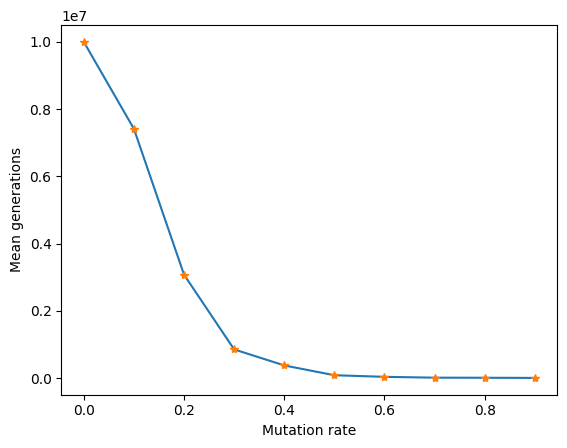

             U0.0          U0.1          U0.2  U0.30000000000000004  \
count        30.0  3.000000e+01  3.000000e+01          3.000000e+01   
mean   10000000.0  7.413386e+06  3.076488e+06          8.530376e+05   
std           0.0  4.114202e+06  4.182153e+06          2.183768e+06   
min    10000000.0  1.570000e+03  3.110000e+02          1.800000e+01   
25%    10000000.0  3.536332e+06  1.938250e+04          6.488750e+03   
50%    10000000.0  1.000000e+07  3.967765e+05          4.143450e+04   
75%    10000000.0  1.000000e+07  7.391945e+06          4.402408e+05   
max    10000000.0  1.000000e+07  1.000000e+07          9.627402e+06   

               U0.4           U0.5  U0.6000000000000001  U0.7000000000000001  \
count  3.000000e+01      30.000000            30.000000            30.000000   
mean   3.766065e+05   84505.733333         36792.266667         12085.733333   
std    7.386140e+05  154426.642027         70692.777053         20708.318425   
min    6.580000e+02      46.000000      

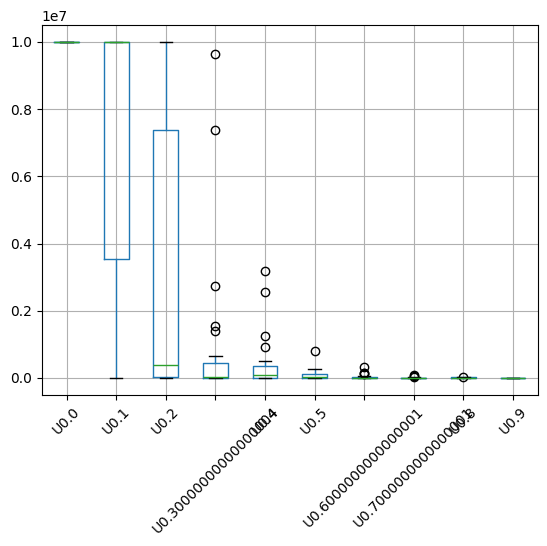

In [11]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.1
u_list = list(np.arange(0, 1+step, step))

run_exp(u_list, phrase, qntd_exp)

In [4]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.01
u_list = list(np.arange(0, 0.4, step))

run_exp(u_list, phrase, qntd_exp)

Generating phrases for different mutation rates: 
 [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39]


KeyboardInterrupt: 

Generating phrases for different mutation rates: 
 [0.8, 0.801, 0.802, 0.803, 0.804, 0.805, 0.806, 0.807, 0.808, 0.809, 0.81, 0.811, 0.812, 0.8130000000000001, 0.8140000000000001, 0.8150000000000001, 0.8160000000000001, 0.8170000000000001, 0.8180000000000001, 0.8190000000000001, 0.8200000000000001, 0.8210000000000001, 0.8220000000000001, 0.8230000000000001, 0.8240000000000001, 0.8250000000000001, 0.8260000000000001, 0.8270000000000001, 0.8280000000000001, 0.8290000000000001, 0.8300000000000001, 0.8310000000000001, 0.8320000000000001, 0.8330000000000001, 0.8340000000000001, 0.8350000000000001, 0.8360000000000001, 0.8370000000000001, 0.8380000000000001, 0.8390000000000001, 0.8400000000000001, 0.8410000000000001, 0.8420000000000001, 0.8430000000000001, 0.8440000000000001, 0.8450000000000001, 0.8460000000000001, 0.8470000000000001, 0.8480000000000001, 0.8490000000000001, 0.8500000000000001, 0.8510000000000001, 0.8520000000000001, 0.8530000000000001, 0.8540000000000001, 0.8550000000000001, 

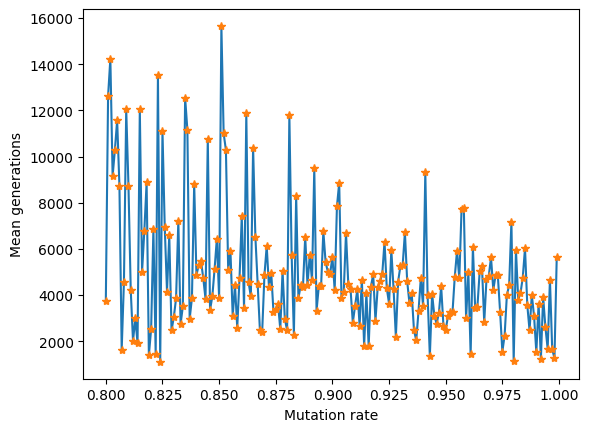

               U0.8        U0.801        U0.802        U0.803        U0.804  \
count      5.000000      5.000000      5.000000      5.000000      5.000000   
mean    3750.000000  12632.000000  14243.600000   9153.000000  10289.800000   
std     4637.078337  18104.408041  10363.672264  12305.816206  13430.978471   
min      440.000000    114.000000    859.000000   1012.000000   1155.000000   
25%      504.000000   2514.000000   7885.000000   1939.000000   1611.000000   
50%     1775.000000   2689.000000  15411.000000   4835.000000   6362.000000   
75%     4535.000000  14388.000000  19280.000000   7258.000000   8690.000000   
max    11496.000000  43455.000000  27783.000000  30721.000000  33631.000000   

             U0.805        U0.806       U0.807       U0.808        U0.809  \
count      5.000000      5.000000     5.000000     5.000000      5.000000   
mean   11576.400000   8742.000000  1637.600000  4586.000000  12042.400000   
std    13160.787868   7994.205527  1644.096043  3364.5853

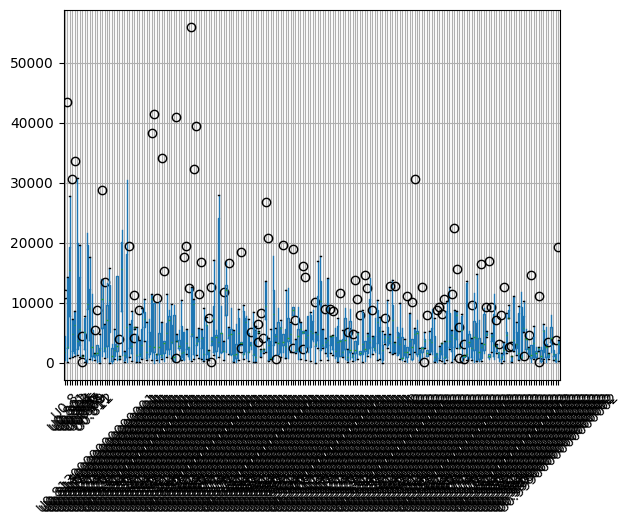

In [7]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 5
step = 0.001
u_list = list(np.arange(0.8, 1, step))

run_exp(u_list, phrase, qntd_exp)